## 数据集概览

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


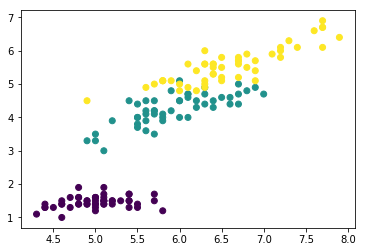

In [2]:
'''
使用Iris数据集（鸢尾花卉数据集）来进行我们的第一次预测。
该数据集包含150条记录的一组数据，有5个属性——花瓣长度，花瓣宽度，萼片长度，萼片宽度和类别。
三个类别分别是Iris Setosa（山鸢尾），Iris Virginica（维吉尼亚鸢尾）和Iris Versicolor（变色鸢尾）。
对于我们的无监督算法，我们给出鸢尾花的这四个特征，并预测它属于哪一类。
'''
# Importing Modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Loading dataset 
iris_df = datasets.load_iris()
print(dir(iris_df))

# Features 
print(iris_df.feature_names)

# Targets
print(iris_df.target)

# Target Names
print(iris_df.target_names)
label = {0:'red',1:'blue',2:'green'}

# Dataset slicing
x_axis = iris_df.data[:,0]
y_axis = iris_df.data[:,2]

# Plotting
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

## 聚类算法（Clustering algorithms）

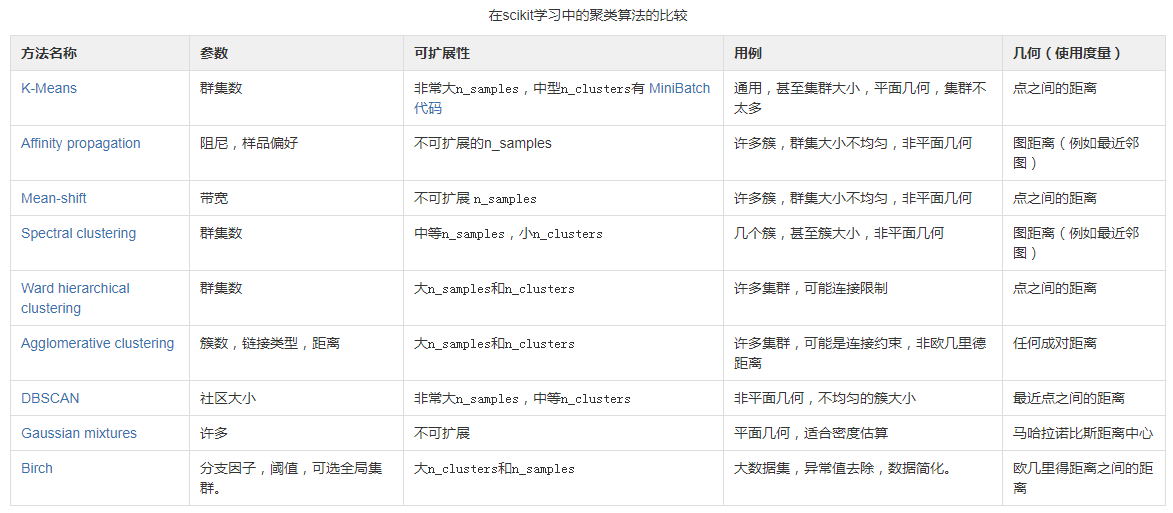

### 1. K-Means聚类    
K-means通常被称为劳埃德算法。在基本术语中，算法有三个步骤。   
第一步选择初始质心，最基本的方法是ķ从数据集中选择样本 X。初始化后，K-means由两个其他步骤之间的循环组成。   
第一步将每个样本分配到其最近的质心。   
第二步通过取分配给每个先前质心的所有样本的平均值来创建新的质心。计算旧和新质心之间的差异，并且算法重复这些最后两个步骤，直到该值小于阈值。换句话说，它重复，直到质心不显着移动。

In [3]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans

# Loaning dataset
iris_df = datasets.load_iris()

# Declaring Model 初始化模型
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(iris_df.data)

# Predicting a single input
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Prediction on the entire data
all_predictions = model.predict(iris_df.data)

# Printing Predictions
print(predicted_label)
print(all_predictions)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### 2. 分层聚类（Hierarchical clustering）   
层次聚类是一个通用的聚类算法族，它们通过依次合并或分割来构建嵌套簇。簇的这种层次被表示为树（或树形图）。树的根是收集所有样本的唯一簇，叶是仅具有一个样本的簇。

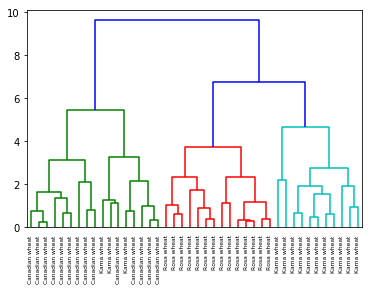

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

seeds_df = pd.read_csv(
    "https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv")

# remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# extract the measurements as a NumPy array
samples = seeds_df.values

"""
Perform hierarchical clustering on samples using the
linkage() function with the method='complete' keyword argument.
Assign the result to mergings.
"""
mergings = linkage(samples, method='complete')

"""
Plot a dendrogram using the dendrogram() function on mergings,
specifying the keyword arguments labels=varieties, leaf_rotation=90,
and leaf_font_size=6.
"""

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

### K Means聚类与分层聚类的区别
* 分层聚类不能很好地处理大数据，但K Means聚类可以。因为K Means的时间复杂度是线性的，即O（n），而分层聚类的时间复杂度是二次的，即O（n2）。
* 在K Means聚类中，当我们从聚类的任意选择开始时，多次运行算法产生的结果可能会有所不同。不过结果可以在分层聚类中重现。
* 当聚类的形状是超球形时（如2D中的圆形，3D中的球形），K Means聚类更好。
* K-Means聚类不允许嘈杂的数据，而在分层聚类中，可以直接使用嘈杂的数据集进行聚类。

### 3. t-SNE聚类   
t-SNE聚类是用于可视化的无监督学习方法之一。t-SNE表示t分布的随机近邻嵌入。它将高维空间映射到可以可视化的2或3维空间。
具体而言，它通过二维点或三维点对每个高维对象进行建模，使得相似的对象由附近的点建模，而不相似的对象很大概率由远离的点建模。

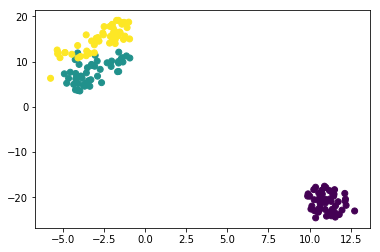

'\n这里Iris数据集具有四个特征（4d），它被变换并以二维图形表示。类似地，t-SNE模型可以应用于具有n个特征的数据集\n'

In [5]:
# Importing Modules
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Loading dataset
iris_df = datasets.load_iris()

# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(iris_df.data)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

'''
这里Iris数据集具有四个特征（4d），它被变换并以二维图形表示。类似地，t-SNE模型可以应用于具有n个特征的数据集
'''

### 4. DBSCAN聚类   
DBSCAN（Density-Based Spatial Clustering of Applications with Noise，具有噪声的基于密度的聚类方法）是一种流行的聚类算法，用作预测分析中 K-means的替代。它不要求输入聚类的数值才能运行。但作为交换，你必须调整其他两个参数。

scikit-learn实现提供了eps和min_samples参数的默认值，但这些参数通常需要调整。eps参数是在同一邻域中考虑的两个数据点之间的最大距离。min_samples参数是被认为是聚类的邻域中的数据点的最小量。

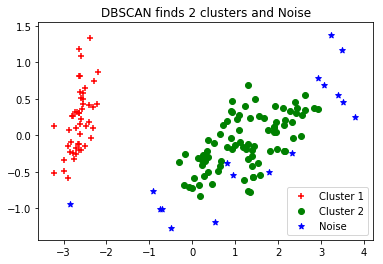

In [6]:
# Importing Modules
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load Dataset
iris = load_iris()

# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(iris.data)

# Transoring Using PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()


Finds core samples of high density and expands clusters from them.
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


D:\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


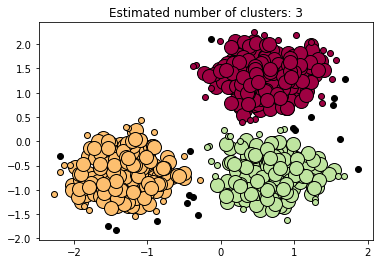

In [14]:
'''Finds core samples of high density and expands clusters from them.'''
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### 5. MiniBatchKMeans    
这MiniBatchKMeans是KMeans使用小批量来减少计算时间的算法的变体，同时仍然尝试优化相同的目标函数。小批量是输入数据的子集，在每次训练迭代中随机抽样。这些迷你批次大大减少了融合到本地解决方案所需的计算量。与其他减少k-means收敛时间的算法相反，小批量k-means产生的结果通常只比标准算法略差。  
该算法在两个主要步骤之间进行迭代，类似于vanilla k-means。在第一步中，b样本从数据集中随机绘制，形成一个小批量。然后将它们分配到最近的质心。在第二步中，质心被更新。与k-means相反，这是在每个样本的基础上完成的。对于小批量中的每个样品，通过取样品的流平均值和分配给该质心的所有先前样品来更新分配的质心。这具有随时间降低质心的变化率的效果。执行这些步骤直到达到收敛或达到预定次数的迭代。

MiniBatchKMeans收敛速度快于结果KMeans，但结果的质量降低。在实践中，质量差异可能相当小，如示例和引用的参考。


Plot a dendrogram using the dendrogram() function on mergings,
specifying the keyword arguments labels=varieties, leaf_rotation=90,
and leaf_font_size=6.



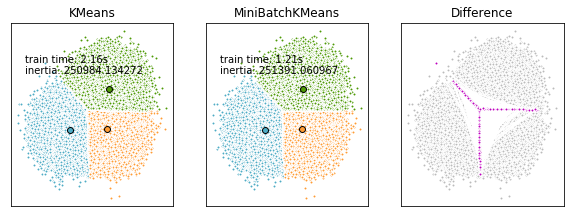

In [12]:
'''
    Comparison of the K-Means and MiniBatchKMeans clustering algorithms

'''

print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=300000, centers=centers, cluster_std=0.7)

# #############################################################################
# Compute clustering with Means

k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

# #############################################################################
# Compute clustering with MiniBatchKMeans

mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

# #############################################################################
# Plot result

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  mbk_means_cluster_centers)

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %
         (t_mini_batch, mbk.inertia_))

# Initialise the different array to all False
different = (mbk_means_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((k_means_labels == k) != (mbk_means_labels == order[k]))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

### 6. Affinity Propagation（近邻传播）   
AffinityPropagation通过在采样对之间发送消息来创建集群，直到收敛。然后使用少量示例来描述数据集，其被标识为最具代表性的其他样本。在对之间发送的消息表示一个样本作为另一个样本的样本的适用性，其被更新为响应于来自其他对的值。这种更新迭代直到收敛，此时选择最终样本，因此给出了最终聚类。  

Finds core samples of high density and expands clusters from them.
Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


D:\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


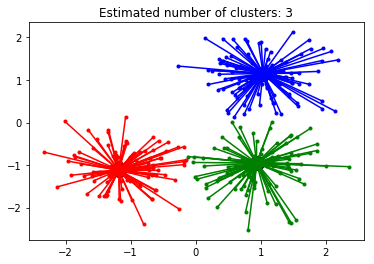

In [15]:
# Demo of affinity propagation clustering algorithm
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## 聚类评估指标

In [17]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans

### 1. 轮廓系数（Silhouette Coefficient）[参考文档](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)   
silhouette 是一个衡量一个结点与它属聚类相较于其它聚类的相似程度，取值范围-1到1，值越大表明这个结点更匹配其属聚类而不与相邻的聚类匹配。如果大多数结点都有很高的silhouette value，那么聚类适当。若许多点都有低或者负的值，说明分类过多或者过少。    
   
**定义**   
轮廓系数结合了凝聚度和分离度，其计算步骤如下： 
1. 对于第i个对象，计算它到所属簇中所有其他对象的平均距离，记为ai（体现凝聚度） 
2. 对于第i个对象和不包含该对象的任意簇，记为bi（体现分离度） 
3. 第i个对象的轮廓系数为si=（bi-ai）/max(ai,bi)   

In [16]:
# Load Dataset
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

# Fitting Model
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)

# Calculating The Silhouette Coefficient
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.5528190123564091

### 2. Calinski-Harabaz指数   
如果标签是未知的，sklearn.metrics.calinski_harabaz_score则可以使用Calinski-Harabaz指数（）来评估模型，其中较高的Calinski-Harabaz分数与具有更好定义的聚类的模型相关。  

**优点**:  
* 当集群密集且分离好时，分数更高，这与集群的标准概念有关。
* 得分快速计算  

**缺点**:
* 凸群的Calinski-Harabaz指数通常高于簇的其他概念，例如通过DBSCAN获得的基于密度的集群。

In [25]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.calinski_harabaz_score(X, labels) 

561.62775662962

### 3. Adjusted Rand index（调整后兰德指数） [参考文档](https://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index)   
该指标是衡量两个赋值相似度的函数，忽略排列组合  

**优点**：  
* 随机（统一）标签分配 对于任何值的ARI分数接近0.0n_clusters，n_samples（对于原始的兰德指数或V度量，情况不是这样）。
* 有界范围[-1,1]：负值是坏的（独立标注），相似的聚类具有正的ARI，1.0是完美的匹配得分。
* 对集群结构没有作出任何假设：可以用于比较聚类算法，例如k-means，其假设各向同性斑点形状与可以找到具有“折叠”形状的聚类的频谱聚类算法的结果。

**缺点**：
* 与惯性相反，ARI需要对地面真相类的知识，而在实践中几乎不可用，或者需要人工注释者的人工分配（如在受监督的学习环境中）。
* 然而，ARI也可以在纯无人监控的设置中用作可用于聚类模型选择（TODO）的共识索引的构建块。

In [18]:
# Load Dataset
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

# Fitting Model
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)

# Calculating The Silhouette Coefficient
labels = kmeans_model.labels_

metrics.adjusted_rand_score(y, labels) 

0.7302382722834697

In [20]:
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
print(metrics.adjusted_rand_score(labels_true, labels_pred) )

# 改变预测命名or交换位置，不影响指标数值
labels_pred = [1, 1, 0, 0, 3, 3]
print(metrics.adjusted_rand_score(labels_true, labels_pred) )

# 交换参数位置，不改变指标数值
print(metrics.adjusted_rand_score(labels_pred, labels_true) )

# 完美预测，指标数值为1
labels_pred = labels_true[:]
print(metrics.adjusted_rand_score(labels_true, labels_pred))

# 没有预测出所有的标签类别
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]
print(metrics.adjusted_rand_score(labels_true, labels_pred) )

0.24242424242424246
0.24242424242424246
0.24242424242424246
1.0
-0.12903225806451613


### 4. Mutual Information based scores（基于相互信息的分数）   
鉴于labels_true相同样本的基本真实类分配和我们的聚类算法分配的知识labels_pred， 互信息是衡量两个分配的一致性的函数，忽略排列。这种措施的两个不同的标准化版本是可用的，归一化互信息（NMI）和调整的相互信息（AMI）。文献中经常使用NMI，而最近提出了AMI，并针对机会进行归一化：   
**优点**：  
* 随机的（均匀的）标签指定具有AMI得分接近0.0 为任何值n_clusters和n_samples（其不是生互信息或V-措施例如的情况下）。
* 有界范围[0，1]：接近零的值表示两个主要独立的标签分配，而接近1的值表示重要的一致性。此外，恰好为0的值表示纯独立的标签分配，并且恰好为1的AMI表示两个标签分配是相等的（有或没有排列）。
* 对集群结构没有作出任何假设：可以用于比较聚类算法，例如k-means，其假设各向同性斑点形状与可以找到具有“折叠”形状的聚类的频谱聚类算法的结果。  

**缺点**：    
* 与惯性相反，基于MI的措施需要了解地面真相类，而在实践中几乎不可用，或需要人为注释者的人工分配（如在受监督的学习环境中）。
然而，基于MI的措施也可用于纯粹无监督的设置，作为可用于聚类模型选择的共识索引的构建块。
* NMI和MI没有调整机会。

In [22]:
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

metrics.adjusted_mutual_info_score(labels_true, labels_pred) 

0.2250422831983088

### 5. Homogeneity, completeness and V-measure（同质性，完整性和V度量）

In [24]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

print(metrics.homogeneity_score(labels_true, labels_pred) )
print(metrics.completeness_score(labels_true, labels_pred))
print(metrics.v_measure_score(labels_true, labels_pred)   )

# 同时计算
print(metrics.homogeneity_completeness_v_measure(labels_true, labels_pred))

0.6666666666666669
0.420619835714305
0.5158037429793889
(0.6666666666666669, 0.420619835714305, 0.5158037429793889)
